In [56]:
import pandas as pd

## Step 1: Load datasets

In [57]:
ehr_data = pd.read_csv("Sample EHR Data.csv")

In [58]:
db_data = pd.read_csv("Sample DB Data.csv")

In [59]:
db_data

,Patient Name,Provider Name,from_date_range,cpt_codes
0,Lucas Smith,Aiden King,2024-07-03,"{97110,97112,97140,97010}"
1,Lucas Smith,Charlotte Williams,2024-07-11,"{97112,97010,97140,97110}"
2,Lucas Smith,Charlotte Williams,2024-07-17,"{97110,97140,97112,97010}"
3,Lucas Smith,Julian Lee,2024-07-27,"{97140,97110,97112,97010}"
4,Lucas Smith,Aiden King,2024-08-07,"{97010,97110,97112,97140}"
...,...,...,...,...
6477,Zoe Miller,Sebastian Martinez,2024-09-25,"{97010,97110,97014,97140}"
6478,Mateo Smith,Aiden King,2024-07-22,"{G0283,97161,97140,97010,97110}"
6479,Ava Davis,Charlotte Williams,2024-08-21,"{97010,97110,97162,97140}"
6480,Ava Davis,Noah Lee,2024-08-23,"{97140,97010}"


In [60]:
ehr_data

,Patient Name,Provider Name,Date of Service,CPT Code
0,Ava Johnson,Liam Young,09/24/2024,97010
1,Ava Johnson,Liam Young,09/24/2024,97140
2,Sophia King,Sebastian Miller,07/03/2024,97140
3,Carter Brown,Charlotte Williams,09/09/2024,97014
4,Olivia Davis,Noah Lee,09/09/2024,97140
...,...,...,...,...
25951,Olivia Brown,Aiden King,08/02/2024,97110
25952,Sophia Williams,Sebastian Miller,09/03/2024,97140
25953,Emma Smith,Noah Lee,09/16/2024,97112
25954,Scarlett Smith,NaN,NaN,NaN


# Step 2: Create unique IDs


In [61]:
ehr_data['unique_id'] = ehr_data['Patient Name'] + "_" + ehr_data['Provider Name'] + "_" + ehr_data['Date of Service']
db_data['unique_id'] = db_data['Patient Name'] + "_" + db_data['Provider Name'] + "_" + db_data['from_date_range']


In [62]:
db_data

,Patient Name,Provider Name,from_date_range,cpt_codes,unique_id
0,Lucas Smith,Aiden King,2024-07-03,"{97110,97112,97140,97010}",Lucas Smith_Aiden King_2024-07-03
1,Lucas Smith,Charlotte Williams,2024-07-11,"{97112,97010,97140,97110}",Lucas Smith_Charlotte Williams_2024-07-11
2,Lucas Smith,Charlotte Williams,2024-07-17,"{97110,97140,97112,97010}",Lucas Smith_Charlotte Williams_2024-07-17
3,Lucas Smith,Julian Lee,2024-07-27,"{97140,97110,97112,97010}",Lucas Smith_Julian Lee_2024-07-27
4,Lucas Smith,Aiden King,2024-08-07,"{97010,97110,97112,97140}",Lucas Smith_Aiden King_2024-08-07
...,...,...,...,...,...
6477,Zoe Miller,Sebastian Martinez,2024-09-25,"{97010,97110,97014,97140}",Zoe Miller_Sebastian Martinez_2024-09-25
6478,Mateo Smith,Aiden King,2024-07-22,"{G0283,97161,97140,97010,97110}",Mateo Smith_Aiden King_2024-07-22
6479,Ava Davis,Charlotte Williams,2024-08-21,"{97010,97110,97162,97140}",Ava Davis_Charlotte Williams_2024-08-21
6480,Ava Davis,Noah Lee,2024-08-23,"{97140,97010}",Ava Davis_Noah Lee_2024-08-23


In [63]:
ehr_data

,Patient Name,Provider Name,Date of Service,CPT Code,unique_id
0,Ava Johnson,Liam Young,09/24/2024,97010,Ava Johnson_Liam Young_09/24/2024
1,Ava Johnson,Liam Young,09/24/2024,97140,Ava Johnson_Liam Young_09/24/2024
2,Sophia King,Sebastian Miller,07/03/2024,97140,Sophia King_Sebastian Miller_07/03/2024
3,Carter Brown,Charlotte Williams,09/09/2024,97014,Carter Brown_Charlotte Williams_09/09/2024
4,Olivia Davis,Noah Lee,09/09/2024,97140,Olivia Davis_Noah Lee_09/09/2024
...,...,...,...,...,...
25951,Olivia Brown,Aiden King,08/02/2024,97110,Olivia Brown_Aiden King_08/02/2024
25952,Sophia Williams,Sebastian Miller,09/03/2024,97140,Sophia Williams_Sebastian Miller_09/03/2024
25953,Emma Smith,Noah Lee,09/16/2024,97112,Emma Smith_Noah Lee_09/16/2024
25954,Scarlett Smith,NaN,NaN,NaN,NaN


# Step 3: Identify missing encounters

In [64]:
missing_encounters = ehr_data[~ehr_data['unique_id'].isin(db_data['unique_id'])]

# Step 4: Display or save results

In [65]:
print("Missing Encounters:")
print(missing_encounters[['Patient Name', 'Provider Name', 'Date of Service']])

Missing Encounters:
          Patient Name       Provider Name Date of Service
0          Ava Johnson          Liam Young      09/24/2024
1          Ava Johnson          Liam Young      09/24/2024
2          Sophia King    Sebastian Miller      07/03/2024
3         Carter Brown  Charlotte Williams      09/09/2024
4         Olivia Davis            Noah Lee      09/09/2024
...                ...                 ...             ...
25951     Olivia Brown          Aiden King      08/02/2024
25952  Sophia Williams    Sebastian Miller      09/03/2024
25953       Emma Smith            Noah Lee      09/16/2024
25954   Scarlett Smith                 NaN             NaN
25955   Scarlett Smith                 NaN             NaN

[25956 rows x 3 columns]


In [66]:
missing_encounters

,Patient Name,Provider Name,Date of Service,CPT Code,unique_id
0,Ava Johnson,Liam Young,09/24/2024,97010,Ava Johnson_Liam Young_09/24/2024
1,Ava Johnson,Liam Young,09/24/2024,97140,Ava Johnson_Liam Young_09/24/2024
2,Sophia King,Sebastian Miller,07/03/2024,97140,Sophia King_Sebastian Miller_07/03/2024
3,Carter Brown,Charlotte Williams,09/09/2024,97014,Carter Brown_Charlotte Williams_09/09/2024
4,Olivia Davis,Noah Lee,09/09/2024,97140,Olivia Davis_Noah Lee_09/09/2024
...,...,...,...,...,...
25951,Olivia Brown,Aiden King,08/02/2024,97110,Olivia Brown_Aiden King_08/02/2024
25952,Sophia Williams,Sebastian Miller,09/03/2024,97140,Sophia Williams_Sebastian Miller_09/03/2024
25953,Emma Smith,Noah Lee,09/16/2024,97112,Emma Smith_Noah Lee_09/16/2024
25954,Scarlett Smith,NaN,NaN,NaN,NaN


In [67]:
#Optional: Save to CSV
missing_encounters.to_csv("Missing_Encounters.csv", index=False)

# Step 1: Check for missing values


In [68]:
missing_columns = missing_encounters.isnull().sum()
print("Missing values in columns:\n", missing_columns)

Missing values in columns:
 Patient Name       0
Provider Name      2
Date of Service    2
CPT Code           2
unique_id          2
dtype: int64


# Step 2: Check if 'Date of Service' is in valid date format

In [69]:
# Convert the 'Date of Service' column to datetime and check errors
missing_encounters['Date of Service'] = pd.to_datetime(missing_encounters['Date of Service'], errors='coerce')
invalid_dates = missing_encounters[missing_encounters['Date of Service'].isnull()]
print("\nInvalid Date of Service entries:\n", invalid_dates)


Invalid Date of Service entries:
          Patient Name Provider Name Date of Service CPT Code unique_id
25954  Scarlett Smith           NaN             NaT      NaN       NaN
25955  Scarlett Smith           NaN             NaT      NaN       NaN


# Step 3: Check for missing or invalid CPT Codes


In [70]:
missing_cpt = missing_encounters[missing_encounters['CPT Code'].isnull()]
print("\nEncounters with missing CPT Codes:\n", missing_cpt)


Encounters with missing CPT Codes:
          Patient Name Provider Name Date of Service CPT Code unique_id
25954  Scarlett Smith           NaN             NaT      NaN       NaN
25955  Scarlett Smith           NaN             NaT      NaN       NaN




*  Two encounters are missing the Provider Name, Date of Service, and CPT Code, which is why these encounters were not imported into the database.
*   Missing values can cause issues during data input or import. Due to the lack of relevant information, these encounters might have been excluded.



In [71]:
# Generate a summary report for missing values
missing_summary = missing_encounters.isnull().sum()

In [72]:
# Output the missing summary as a text report
with open('missing_data_report.txt', 'w') as f:
    f.write("Missing Values Summary:\n")
    f.write(missing_summary.to_string())
    f.write("\n\n")

    f.write("Detailed Missing Encounters:\n")
    f.write(missing_encounters.to_string())

print("Report has been generated and saved as 'missing_data_report.txt'")


Report has been generated and saved as 'missing_data_report.txt'


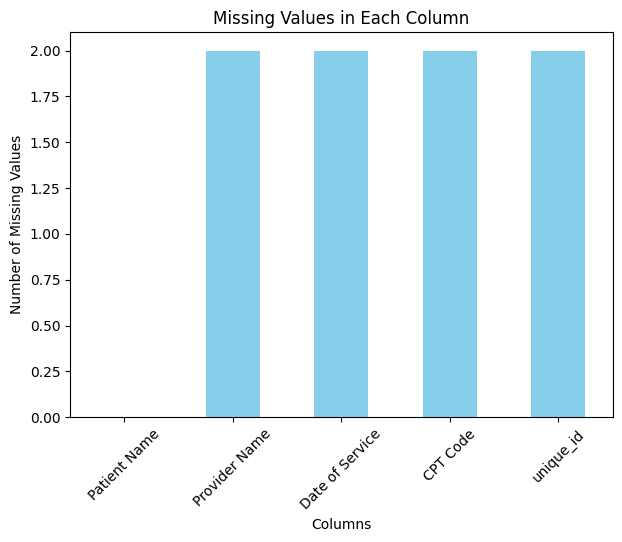

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing missing values in a bar chart
plt.figure(figsize=(7, 5))
missing_encounters.isnull().sum().plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()


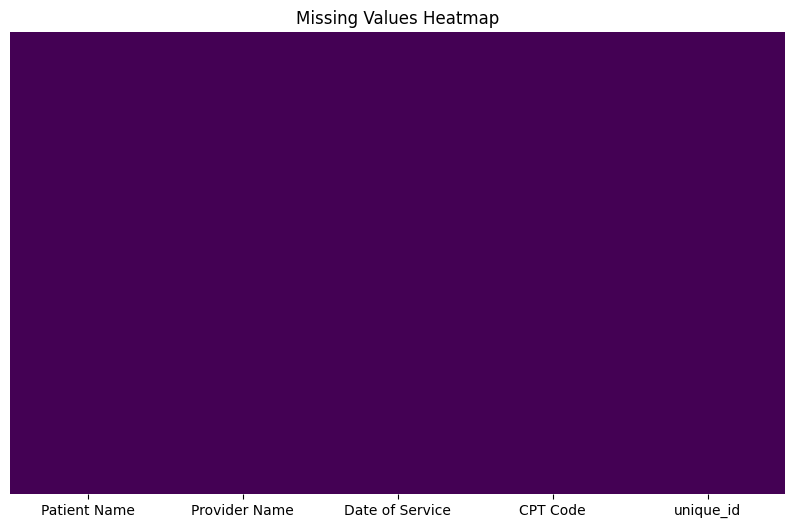

In [74]:
# Optional: Visualizing the missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_encounters.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()
